In [1]:
import torch
import sys
from math import pi, e, sin
import time

sys.path.append('..')

from SourceCode import *

#%matplotlib notebook
#from ipywidgets import *

n_epochs = 10
n_points = 10
dh = 1e-3

# №0.1

$$ x'= -y $$
$$ y' = x + cost(t) $$
$$ x(0) = 0$$ $$y(0) = 0$$
$$t \in [0,1] $$
True_solution: $$x = -\frac{1}{2}tsin(t)$$ $$y = \frac{1}{2}(tcos(t) + sin(t))$$

In [2]:
left_bound = 0
right_bound = 1
main_eq_residual1 = lambda t, x, y: nth_derivative(x(t), t, 1) + y(t)
main_eq_residual2 = lambda t, x, y: nth_derivative(y(t), t, 1) - x(t) - torch.cos(t)
main_eq_residuals = [main_eq_residual1, main_eq_residual2]
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, 
                                         right_bound, 
                                         n_points)


first_init_cond_res = lambda x, nn_model1, nn_model2: nn_model1(x)
first_init_cond = OnePointInitialCondition(left_bound, 
                                           first_init_cond_res)

second_init_cond_res = lambda x, nn_model1, nn_model2: nn_model2(x)
second_init_cond = OnePointInitialCondition(left_bound, 
                                            second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, 
                                     main_eq_residuals, 
                                     boundary_conditions)

models = NNGenerator.generate_models(
            nn_count=2
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, nn_models=models
)
loss_train, loss_valid, nn_models = nn_ode_solver.fit()

Max residual value |R[NN]| on train: 0.021791571751236916
Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.0029852017760276794
Valid max absolute error |Appr(x)-y(x)|: 0.0029387217946350574
MAPE on train data: 0.2376185031607747 %
MAPE on validation data: 0.23757091257721186 %


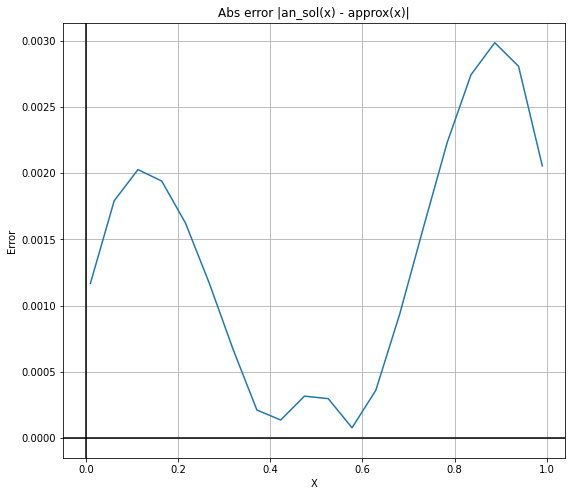

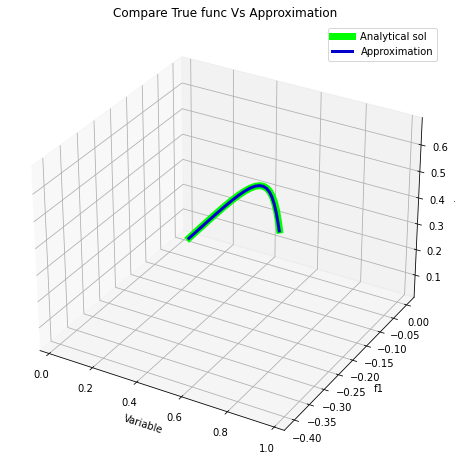

In [3]:
analytical_solution1 = lambda x: -1/2 * x * torch.sin(x)
analytical_solution2 = lambda x: 1/2*(x*torch.cos(x) + torch.sin(x))
analytical_solutions = [analytical_solution1, analytical_solution2]

report = ReportMaker(nn_models,
                         main_domain,
                         compare_to_functions=plot_two_curves,
                         analytical_solutions=analytical_solutions,
                     main_eq_residuals=main_eq_residuals
                         )
report.compare_appr_with_analytical()

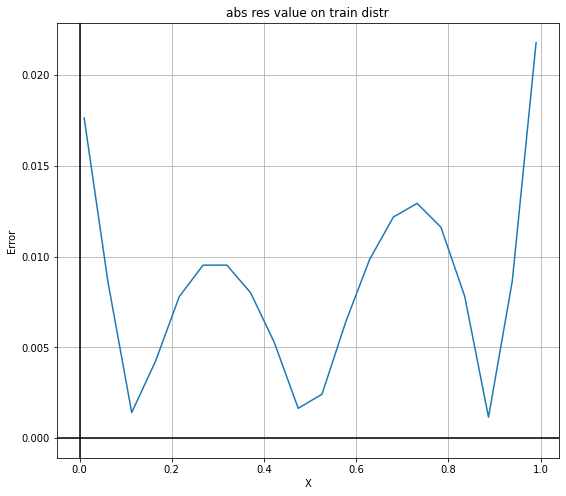

In [4]:
report.plot_abs_residual_distr()

# № 0.2 #

$$ x'= -y $$
$$ y' = x + cost(t) $$
$$ x(0) = 0$$ $$y(0) = 0$$
$$t \in [0,5] $$
True_solution: $$x = -\frac{1}{2}tsin(t)$$ $$y = tcos(t) + \frac{1}{2}sin(t)$$
Approximation satisfying boundary conditions: $$ apprX(t) = t*nn_1(t) $$
$$ apprY(t) = t*nn_2(t) $$

In [18]:
left_bound = 0
right_bound = 5
main_eq_residual1 = lambda t, x, y: nth_derivative(x(t), t, 1) + y(t)
main_eq_residual2 = lambda t, x, y: nth_derivative(y(t), t, 1) - x(t) - torch.cos(t)
main_eq_residuals = [main_eq_residual1, main_eq_residual2]
n_points = 50

dh = 0.001
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

main_eq = MainEquationClass(main_domain, main_eq_residuals)
boundary_satisfying_models = [
        lambda x, model1: x * model1(x),
        lambda x, model2: x * model2(x)
    ]

n_epochs = 50
models = NNGenerator.generate_models(
            nn_count=2, boundary_satisfying_models=boundary_satisfying_models
        )

nn_ode_solver = TrainerForNNEquationSolver(
            main_eq, n_epochs=n_epochs, nn_models=models,
            lr=0.05
)
loss_train, loss_valid, nn_models = nn_ode_solver.fit()


In [19]:
analytical_solution1 = lambda x: -1 / 2 * x * torch.sin(x)
analytical_solution2 = lambda x: 1 / 2 * (x * torch.cos(x) + torch.sin(x))
analytical_solutions = [analytical_solution1, analytical_solution2]
report = ReportMaker(nn_models,
                         main_domain,
                         compare_to_functions=plot_two_curves,
                         analytical_solutions=analytical_solutions,
                         main_eq_residuals=main_eq_residuals
                         )

Max residual value |R[NN]| on train: 0.031052229925990105
Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.006611531600356102
Valid max absolute error |Appr(x)-y(x)|: 0.0066419802606105804
MAPE on train data: 0.23020731750875711 %
MAPE on validation data: 0.231473078019917 %


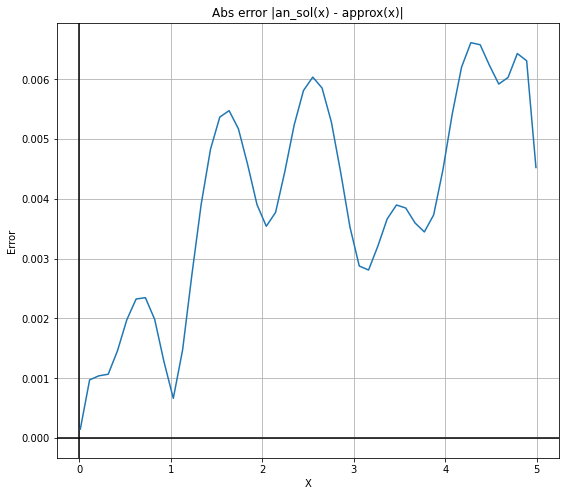

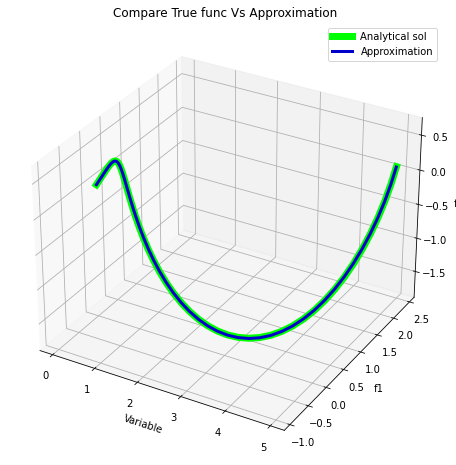

In [20]:
report.compare_appr_with_analytical()

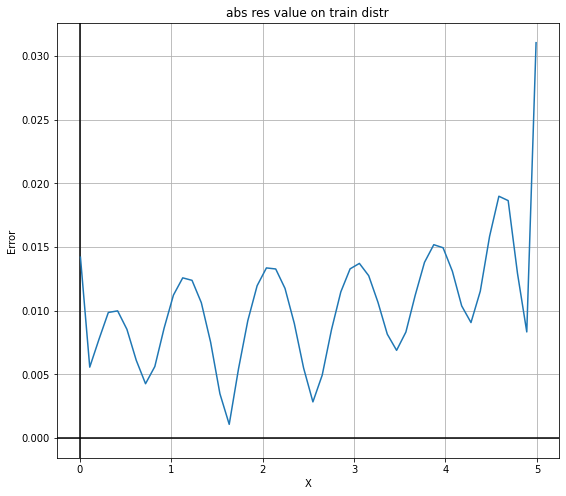

In [21]:
report.plot_abs_residual_distr()

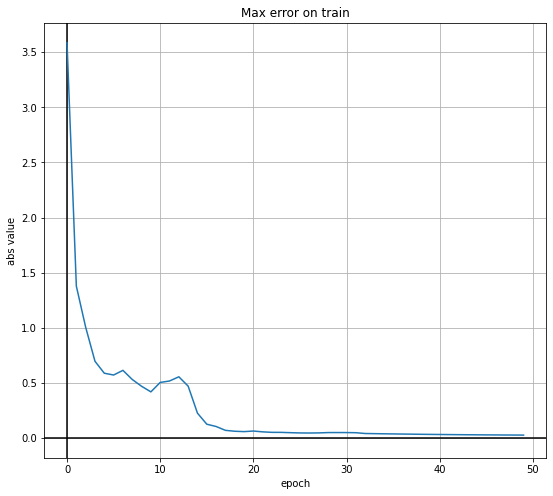

Value at last epoch: 0.026597142219543457


In [22]:
report.plot_error_history(loss_train)